### Analyze_stable_points - evaluate biase in DEMs using selected unchanged points

These points were picked on hopefully stable points in mostly flat places: docks, lawns, bare spots in middens. Also, the yurt roofs. Typically, 3 to 5 points were picked on most features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r  = np.sqrt( x**2 + y**2 )
    az=np.degrees( np.arctan2(x, y) )
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y

In [36]:
df=pd.read_csv("C:\\crs\\proj\\2019_DorianOBX\\Santa_Cruz_Products\\All_points.csv",header = 0)
col = df.loc[: , "Aug":"Nov"]
df['mean']=col.mean(axis=1)
df['std']=col.std(axis=1)
df['gnd50 anom']=df['lidar_gnd50']-df['mean']
df['all90 anom']=df['lidar all90']-df['mean']
df['Aug anom']=df['Aug']-df['mean']
df['Sep anom']=df['Sep']-df['mean']
df['Oct anom']=df['Oct']-df['mean']
df['Nov anom']=df['Nov']-df['mean']
r,az = pcoord( df['X'].values, df['Y'].values)
xr, yr = xycoord( r, az+42.)
df['alongshore']=xr-2870000.
df

,X,Y,lidar_gnd50,lidar all90,Aug,Sep,Oct,Nov,mean,std,gnd50 anom,all90 anom,Aug anom,Sep anom,Oct anom,Nov anom,alongshore
0,387521.064,3864904.303,2.033,2.148,2.111,2.134,2.099,2.138,2.12050,0.018628,-0.08750,0.02750,-0.00950,0.01350,-0.02150,0.01750,4110.033260
1,387524.918,3864904.854,2.110,2.197,2.219,2.221,2.187,2.268,2.22375,0.033360,-0.11375,-0.02675,-0.00475,-0.00275,-0.03675,0.04425,4113.266032
2,387525.102,3864929.447,1.732,1.784,1.804,1.854,1.791,1.894,1.83575,0.047388,-0.10375,-0.05175,-0.03175,0.01825,-0.04475,0.05825,4129.858699
3,387524.001,3864924.308,1.693,1.763,1.802,1.859,1.830,1.880,1.84275,0.034033,-0.14975,-0.07975,-0.04075,0.01625,-0.01275,0.03725,4125.601835
4,387543.822,3864912.012,1.812,1.823,1.864,1.911,1.869,1.955,1.89975,0.042437,-0.08775,-0.07675,-0.03575,0.01125,-0.03075,0.05525,4132.104078
5,387604.204,3864943.579,1.810,1.839,1.879,1.871,1.904,1.947,1.90025,0.034189,-0.09025,-0.06125,-0.02125,-0.02925,0.00375,0.04675,4198.099095
6,387602.185,3864951.471,1.667,1.683,1.755,1.730,1.749,1.806,1.76000,0.032465,-0.09300,-0.07700,-0.00500,-0.03000,-0.01100,0.04600,4201.879464
7,387604.204,3864943.579,1.810,1.839,1.879,1.871,1.904,1.947,1.90025,0.034189,-0.09025,-0.06125,-0.02125,-0.02925,0.00375,0.04675,4198.099095
8,390597.287,3868350.494,0.380,0.419,0.434,0.495,0.550,0.475,0.48850,0.048225,-0.10850,-0.06950,-0.05450,0.00650,0.06150,-0.01350,8702.064338
9,390597.287,3868350.494,0.380,0.419,0.434,0.495,0.550,0.475,0.48850,0.048225,-0.10850,-0.06950,-0.05450,0.00650,0.06150,-0.01350,8702.064338


In [9]:
df_anom = df.loc[:,"gnd50 anom":"Nov anom"].copy()
df_anom

,gnd50 anom,all90 anom,Aug anom,Sep anom,Oct anom,Nov anom
0,-0.08750,0.02750,-0.00950,0.01350,-0.02150,0.01750
1,-0.11375,-0.02675,-0.00475,-0.00275,-0.03675,0.04425
2,-0.10375,-0.05175,-0.03175,0.01825,-0.04475,0.05825
3,-0.14975,-0.07975,-0.04075,0.01625,-0.01275,0.03725
4,-0.08775,-0.07675,-0.03575,0.01125,-0.03075,0.05525
5,-0.09025,-0.06125,-0.02125,-0.02925,0.00375,0.04675
6,-0.09300,-0.07700,-0.00500,-0.03000,-0.01100,0.04600
7,-0.09025,-0.06125,-0.02125,-0.02925,0.00375,0.04675
8,-0.10850,-0.06950,-0.05450,0.00650,0.06150,-0.01350
9,-0.10850,-0.06950,-0.05450,0.00650,0.06150,-0.01350


In [12]:
print(df_anom.mean())
print(df_anom.std())

gnd50 anom   -0.149401
all90 anom   -0.074193
Aug anom      0.003241
Sep anom      0.057920
Oct anom     -0.023571
Nov anom     -0.037590
dtype: float64
gnd50 anom    0.061545
all90 anom    0.137203
Aug anom      0.051080
Sep anom      0.064225
Oct anom      0.049115
Nov anom      0.068527
dtype: float64


Text(0.5, 0, 'Alongshore Distance (m)')

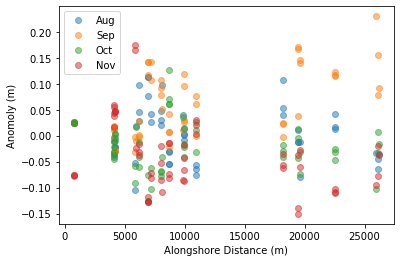

In [37]:
plt.plot(df['alongshore'],df['Aug anom'],'o',alpha=.5,label='Aug')
plt.plot(df['alongshore'],df['Sep anom'],'o',alpha=.5,label='Sep')
plt.plot(df['alongshore'],df['Oct anom'],'o',alpha=.5,label='Oct')
plt.plot(df['alongshore'],df['Nov anom'],'o',alpha=.5,label='Nov')
plt.legend()
plt.ylabel('Anomoly (m)')
plt.xlabel('Alongshore Distance (m)')

Text(0.5, 0, 'Elevation (m NAVD88)')

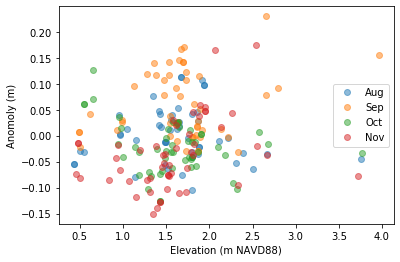

In [38]:
plt.plot(df['Aug'],df['Aug anom'],'o',alpha=.5,label='Aug')
plt.plot(df['Sep'],df['Sep anom'],'o',alpha=.5,label='Sep')
plt.plot(df['Oct'],df['Oct anom'],'o',alpha=.5,label='Oct')
plt.plot(df['Nov'],df['Nov anom'],'o',alpha=.5,label='Nov')
plt.legend()
plt.ylabel('Anomoly (m)')
plt.xlabel('Elevation (m NAVD88)')

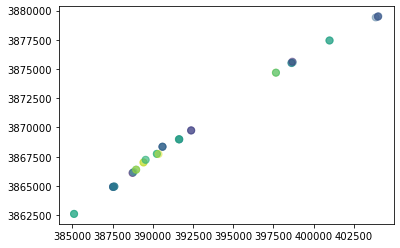

In [21]:
plt.scatter(df['X'].values,df['Y'].values,s=50,c=df['Aug anom'].values,alpha=.4)

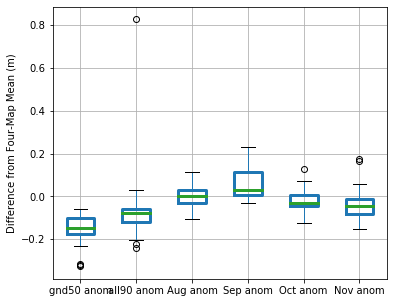

In [13]:
# boxplot of anomolies
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
bp=df_anom.boxplot(figsize=(6,5),grid=True,boxprops=boxprops, medianprops=medianprops)
plt.ylabel('Difference from Four-Map Mean (m)')
plt.savefig('unchanged_pts_boxplot.png',dpi=200)